## Importar librerías y carga de datos de prueba

In [1]:
from sklearn.datasets import make_blobs
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
x, y = make_blobs(n_samples=100, centers=4, n_features=2, cluster_std=[1,1.5,2,2], random_state=7)

In [3]:
df_blobls = pd.DataFrame({
    'x1': x[:,0],
    'x2':x[:,1], 
    'y':y

})

In [4]:
df_blobls

,x1,x2,y
0,-3.384261,5.221740,1
1,-1.836238,-7.735384,3
2,-7.456176,6.198874,0
3,-1.785043,1.609749,1
4,-10.124910,6.133805,0
...,...,...,...
95,7.072755,-0.259937,2
96,-2.626873,-7.228570,3
97,-1.521099,1.802284,1
98,-9.216388,6.670846,0


In [5]:
def plot_2d_clusters(x,y,ax):
    y_uniques = pd.Series(y).unique()

    for _ in y_uniques:
        x[y==_].plot(
            title=f'{len(y_uniques)} Clusters',
            kind='scatter',
            x='x1',
            y='x2',
            marker = f'${_}$',
            ax = ax
        )

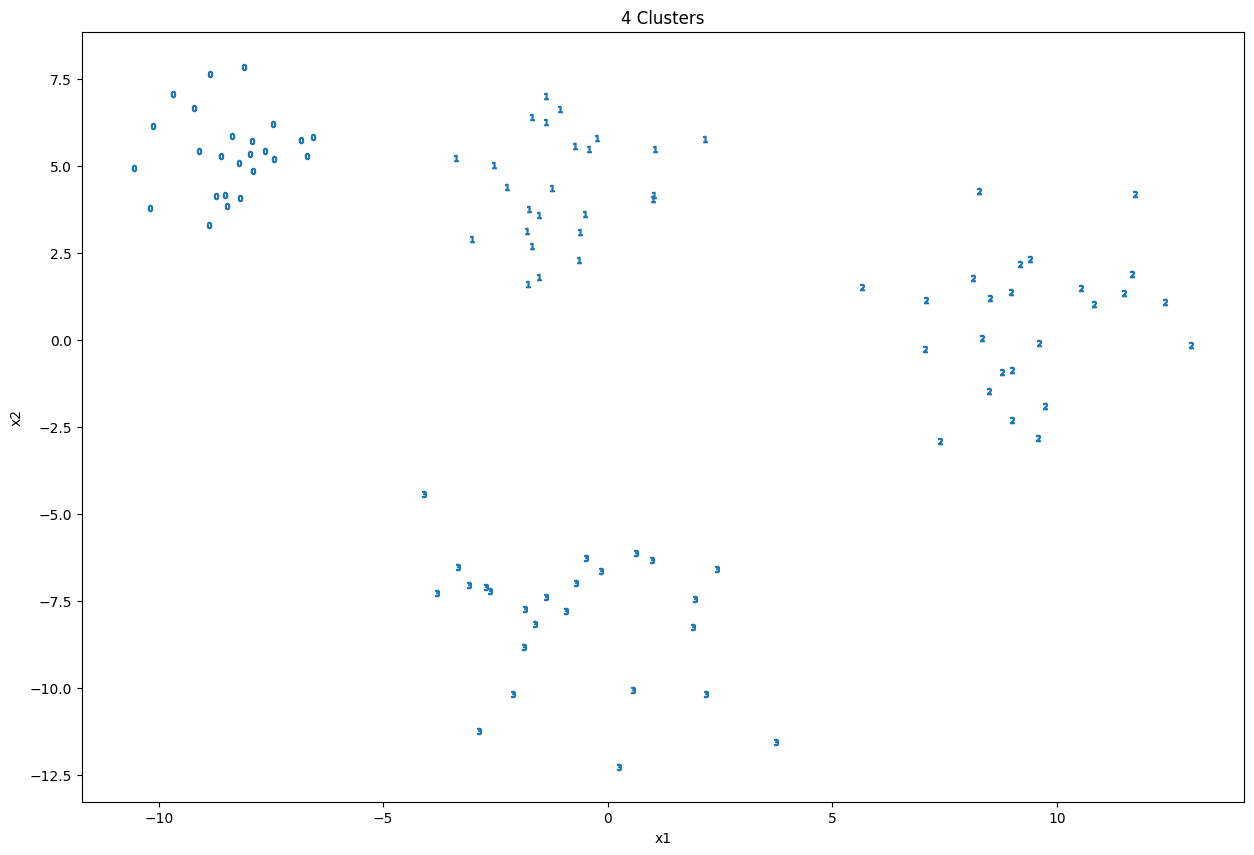

In [6]:
fig, ax = plt.subplots(1,1, figsize=(15,10))
x, y = df_blobls[['x1','x2']], df_blobls['y']
plot_2d_clusters(x,y,ax)

## Aplicando clustering

In [7]:
from sklearn.cluster import KMeans

In [8]:
kmeans = KMeans(n_clusters=5, random_state=7)

In [9]:
y_pred = kmeans.fit_predict(x)

c:\Users\felip\Data_science_course\data_science\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] El sistema no puede encontrar el archivo especificado
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\felip\Data_science_course\data_science\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Program Files\Python313\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Program Files\Python313\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, pr

Text(0.5, 1.0, 'Kmeans 5 Clusters')

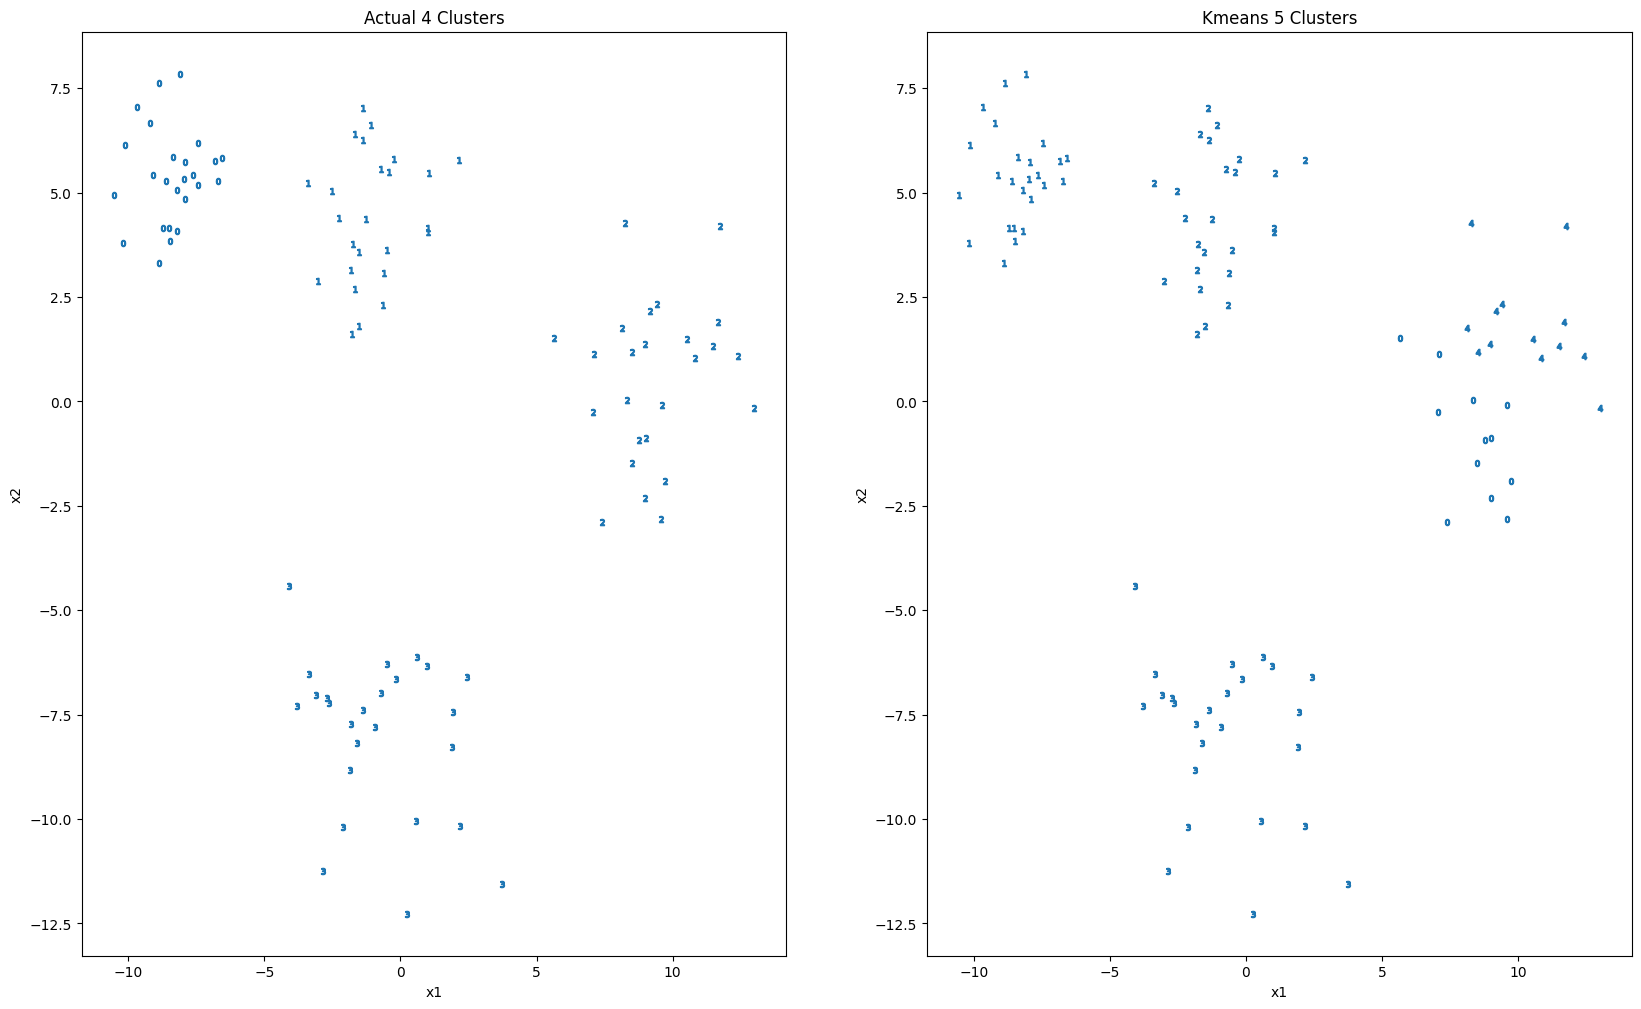

In [10]:
fig, axs = plt.subplots(1,2, figsize=(20,12))
plot_2d_clusters(x,y,axs[0])
plot_2d_clusters(x,y_pred,axs[1])

axs[0].set_title(f'Actual {axs[0].get_title()}')
axs[1].set_title(f'Kmeans {axs[1].get_title()}')



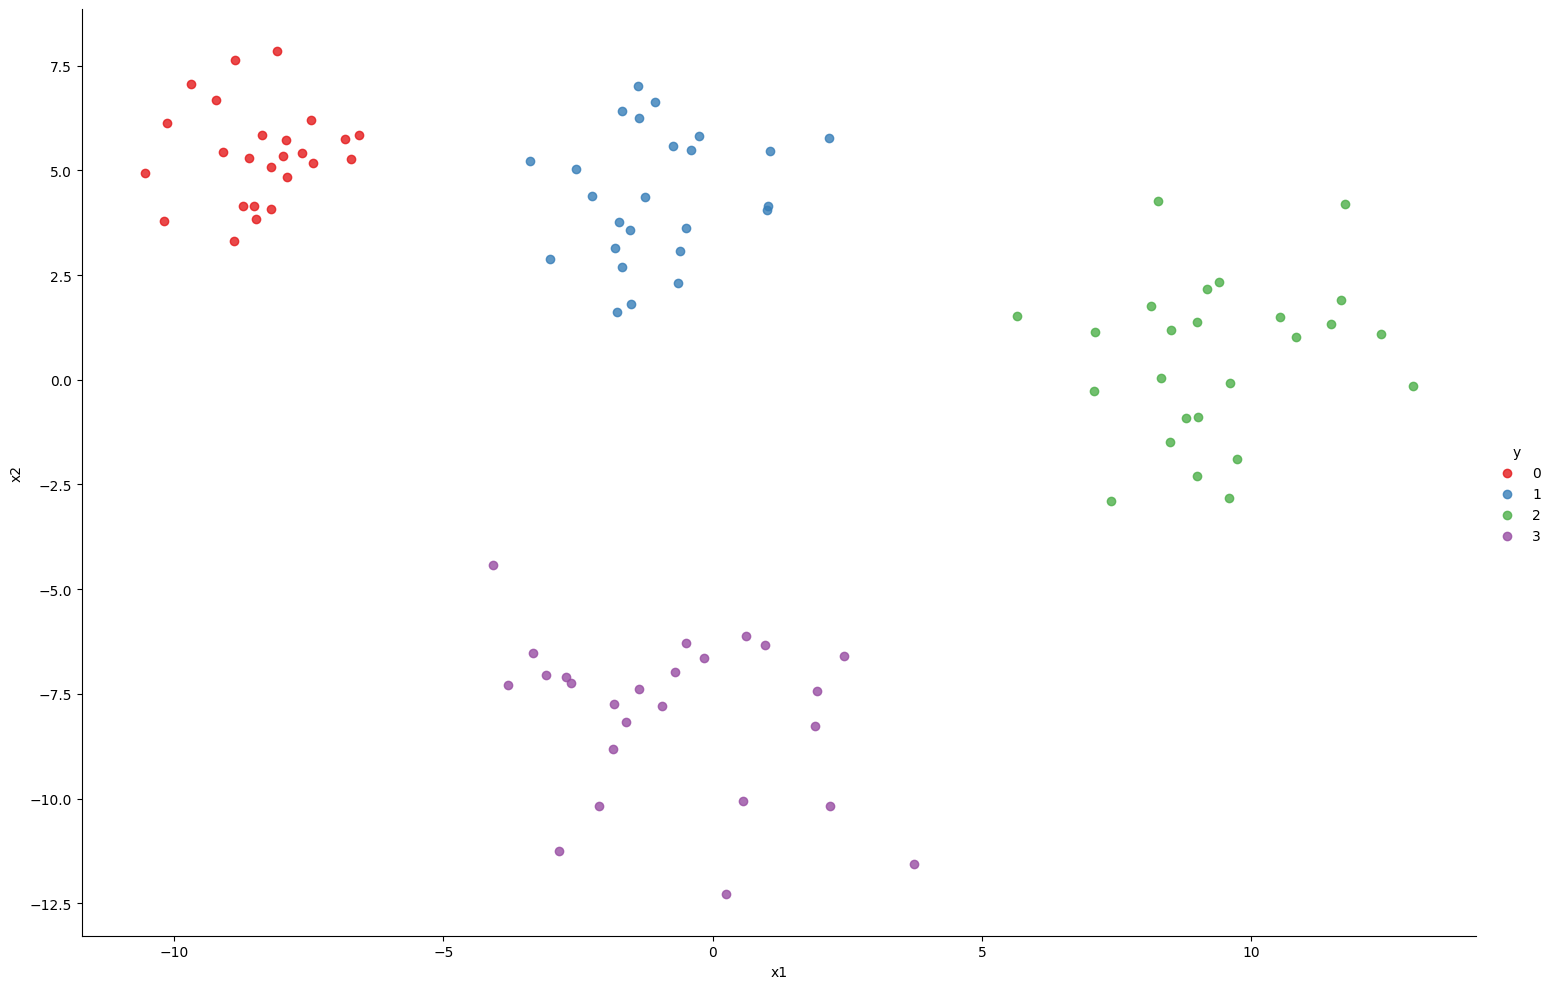

In [11]:
import seaborn as sns
sns.lmplot(
    data=df_blobls,
    x='x1',
    y='x2',
    hue='y',
    fit_reg=False,
    palette='Set1',
    height=10,
    aspect=1.5
)

In [12]:
from sklearn.metrics import silhouette_score

# Calcular el puntaje de silueta
silhouette_avg = silhouette_score(x, y_pred)
print(f"El puntaje promedio de silueta es: {silhouette_avg}")

El puntaje promedio de silueta es: 0.6104663159861343


(-0.1, 1.0)

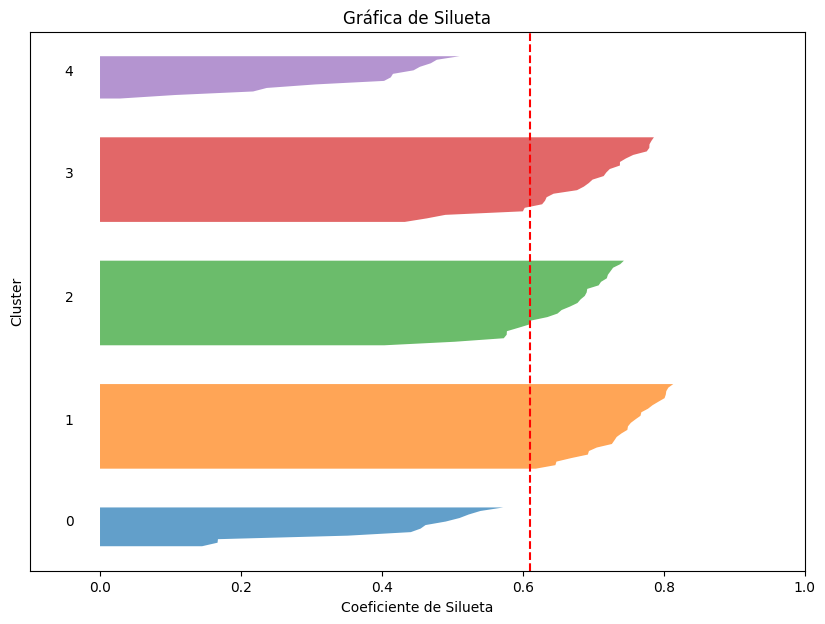

In [13]:
from sklearn.metrics import silhouette_samples
import numpy as np

# Calcular los valores de silueta para cada punto
silhouette_values = silhouette_samples(x, y_pred)

# Crear la gráfica de silueta
fig, ax1 = plt.subplots(1, 1, figsize=(10, 7))

y_lower = 10
for i in range(kmeans.n_clusters):
    # Agregar los valores de silueta para cada cluster
    ith_cluster_silhouette_values = silhouette_values[y_pred == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    ax1.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        alpha=0.7
    )
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    y_lower = y_upper + 10  # 10 para espacio entre clusters

ax1.set_title("Gráfica de Silueta")
ax1.set_xlabel("Coeficiente de Silueta")
ax1.set_ylabel("Cluster")

ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
ax1.set_yticks([])  # Limpiar etiquetas del eje y
ax1.set_xlim([-0.1, 1])